# Wikipedia Progressions: Chord Changes Chronologies


Wikipedia has a few articles about chord progressions, especially focused on 4-chord looping harmonic sequences. This little project stores the given examples in a csv file and plots them.

## Scraping
Get the list of Wikipedia's examples of the given progression, in the form of a table (with various HTML properties). Save it to a csv file in the project's data folder.

In [3]:
# Get the projects data path
from config.config import DATA_PATH
from src.database_building_functions import scrape_wiki_table


# some example sites and output data paths.
site, csv_path = 'https://en.wikipedia.org/wiki/%2750s_progression',\
                 DATA_PATH / 'wiki-50s_progression.csv'
#site, csv_path = 'https://en.wikipedia.org/wiki/I–V–vi–IV_progression',\
#                 DATA_PATH / 'wiki-I-V-vi-IV_progression.csv'
#site, csv_path = 'https://en.wikipedia.org/wiki/IV%E2%96%B37%E2%80%93V7%E2%80%93iii7%E2%80%93vi_progression', \
#                 DATA_PATH / 'IV△7–V7–iii7–vi_progression.csv'

scrape_wiki_table(site=site, output_path=csv_path)

<!DOCTYPE html>

<html class="client-nojs" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>'50s progression - Wikipedia</title>
<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"51f2dc9d-c5a7-4fec-9fec-5d4369356c6d","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"'50s_progression","wgTitle":"'50s progression","wgCurRevisionId":1043699388,"wgRevisionId":1043699388,"wgArticleId":9224598,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Pages containing links to subscription-only content","Articles with short description","Short description is different from Wikidata","All articles with unso

,Song Name,Artist,Year,Progression
0,"""A Teenager in Love""","Dion and the Belmonts; Doc Pomus, Mort Shuman ...",1959,I-vi-IV-V
1,"""Angel Baby""",Rosie and the Originals,1960,I-vi-IV-V
2,"""All I Have to Do Is Dream""",The Everly Brothers,1958,I-vi-IV-V
3,"""Baby""",Justin Bieber,2010,I-vi-IV-V
4,"""Baby Doll""",The Buttertones,2016,I-vi-IV-V
...,...,...,...,...
116,"""Where Have All the Flowers Gone?""",Pete Seeger,1955,I-vi-IV-V
117,"""Who Put the Bomp (in the Bomp, Bomp, Bomp)""",Barry Mann,1961,I-vi-IV-V
118,"""Why Do Fools Fall in Love""",Frankie Lymon & The Teenagers,1956,I-vi-IV-V
119,"""You Don't Own Me""[37]",Lesley Gore,1963,I-vi-IV-V


## Load the table and plot it

Can choose any of these tables found in the data directory:
DATA_PATH / 'wiki-50s_progression.csv'
DATA_PATH / 'wiki-I-V-vi-IV_progression.csv'
DATA_PATH / 'IV△7–V7–iii7–vi_progression.csv'

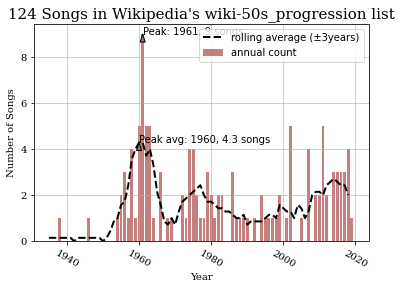

In [4]:
import matplotlib.pyplot as plt
from src.plotting_functions import plot_bar_with_rolling_mean
from src.data_loading import load_table_csv, get_year_list

# load and format the data to graph:
df = load_table_csv(csv_path)
year_list = get_year_list(df)

# add bar of song count along with the rolling mean of +=n years
ax1 = plot_bar_with_rolling_mean(year_list, n=3, progression_name=str(csv_path).split('.csv')[0].split('data\\')[1])